In [60]:
import pandas as pd
import numpy as np
import os
from datetime import date
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
today = date.today()
print("Today's date:", today)

Today's date: 2020-02-25


In [ ]:
'''
2. The first cell in the notebook must include:
    a. Your last name (please don’t include any other identifying information)
    b. The date
    c. A one sentence description of your approach
    d. The estimated AUC you would expect to get on the test.csv data. If your
    estimated AUC is less than .825, your submission will not be reviewed
3. Your code ​must​ be able to predict ​all​ observations in the test dataset. The last cell in the
notebook must output the first five predicted values of the ​outcome​ variable for test.csv.
'''

In [3]:
print(os.listdir("data/data1/"))

['test.zip', 'train.zip']


In [4]:
train = "data/data1/train.zip"
test = 'data/data1/test.zip'
train = pd.read_csv(train)
test = pd.read_csv(test)

In [5]:
train.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [6]:
set(train.device_type)

{'Android', 'desktop', 'iPhone', 'laptop', 'other'}

In [7]:
train.device_type.value_counts()

desktop    2032
Android    2023
laptop     1991
other      1986
iPhone     1968
Name: device_type, dtype: int64

In [13]:
pd.pivot_table(train, values = ['age'], index = ['device_type'], aggfunc = np.mean)

,age
device_type,
Android,38.429560
desktop,37.628937
iPhone,37.619919
laptop,38.380211
other,37.896274


In [10]:
train.gender.value_counts()

F    4970
M    4761
Name: gender, dtype: int64

In [12]:
pd.pivot_table(train, values = ['age'], index = ['gender'], aggfunc = np.mean)

,age
gender,
F,38.051308
M,37.903382


In [18]:
pd.pivot_table(train, values = ['income'], index = ['age'], aggfunc = np.mean)

,income
age,
16,35845.627706
17,36943.206422
18,37591.085427
19,39251.995633
20,40075.960526
21,41886.426160
22,41902.115226
23,43495.008439
24,44141.736111


In [14]:
train.describe()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000
mean,37.991800,0.004666,0.497500,58004.335800,1.497000,2.00220,5.406800,0.0982
std,13.038203,0.000838,0.500019,17330.778355,0.500016,0.81784,5.046014,0.2976
min,16.000000,0.003171,0.000000,16241.000000,1.000000,1.00000,0.000000,0.0000
25%,27.000000,0.003995,0.000000,45533.500000,1.000000,1.00000,1.000000,0.0000
50%,38.000000,0.004625,0.000000,58053.500000,1.000000,2.00000,4.000000,0.0000
75%,49.000000,0.005164,1.000000,70235.250000,2.000000,3.00000,8.000000,0.0000
max,60.000000,0.007082,1.000000,99956.000000,2.000000,3.00000,22.000000,1.0000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                           10000 non-null int64
cost_of_ad                    10000 non-null float64
device_type                   10000 non-null object
gender                        9731 non-null object
in_initial_launch_location    10000 non-null int64
income                        10000 non-null int64
n_drivers                     10000 non-null int64
n_vehicles                    10000 non-null int64
prior_ins_tenure              10000 non-null int64
outcome                       10000 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 781.3+ KB


In [16]:
train.isna().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [19]:
null_data = train[train.isnull().any(axis=1)]
null_data

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
15,32,0.003519,Android,NaN,0,71909,1,3,8,0
38,54,0.005529,iPhone,NaN,0,87122,2,3,8,0
91,35,0.005510,iPhone,NaN,0,52343,1,3,3,0
113,41,0.004282,Android,NaN,0,72978,2,2,11,0
122,34,0.005518,iPhone,NaN,0,50425,2,3,3,0
161,30,0.003810,laptop,NaN,1,64773,1,1,1,0
163,54,0.005794,iPhone,NaN,0,84405,1,3,15,0
189,48,0.003734,desktop,NaN,0,72464,2,2,12,0
190,17,0.005405,iPhone,NaN,1,55135,2,1,0,0
199,18,0.003851,Android,NaN,1,22917,2,3,0,0


In [20]:
del null_data

In [18]:
test.isna().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        249
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
dtype: int64

seems like both train and test have missing values in gender. Let's clean them togehter

In [39]:
train['Type']='Train' #Create a flag for Train and Test Data set
test['Type']='Test'
dat = pd.concat([train,test], axis= 0,sort= False)

In [40]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 11 columns):
age                           20000 non-null int64
cost_of_ad                    20000 non-null float64
device_type                   20000 non-null object
gender                        19482 non-null object
in_initial_launch_location    20000 non-null int64
income                        20000 non-null int64
n_drivers                     20000 non-null int64
n_vehicles                    20000 non-null int64
prior_ins_tenure              20000 non-null int64
outcome                       10000 non-null float64
Type                          20000 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [41]:
dat = dat.dropna(subset = ['gender'])

simply dropping the missing variable

In [42]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19482 entries, 0 to 9999
Data columns (total 11 columns):
age                           19482 non-null int64
cost_of_ad                    19482 non-null float64
device_type                   19482 non-null object
gender                        19482 non-null object
in_initial_launch_location    19482 non-null int64
income                        19482 non-null int64
n_drivers                     19482 non-null int64
n_vehicles                    19482 non-null int64
prior_ins_tenure              19482 non-null int64
outcome                       9731 non-null float64
Type                          19482 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [43]:
category_columns = ["device_type","gender"]


for col in category_columns:
    dat[col] = dat[col].astype('category')

In [44]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19482 entries, 0 to 9999
Data columns (total 11 columns):
age                           19482 non-null int64
cost_of_ad                    19482 non-null float64
device_type                   19482 non-null category
gender                        19482 non-null category
in_initial_launch_location    19482 non-null int64
income                        19482 non-null int64
n_drivers                     19482 non-null int64
n_vehicles                    19482 non-null int64
prior_ins_tenure              19482 non-null int64
outcome                       9731 non-null float64
Type                          19482 non-null object
dtypes: category(2), float64(2), int64(6), object(1)
memory usage: 1.5+ MB


In [47]:
train=dat[dat['Type']=='Train']
test=dat[dat['Type']=='Test']

In [48]:
train['is_train'] = np.random.uniform(0, 1, len(train)) <= .75
Train, Validate = train[train['is_train']==True], train[train['is_train']==False]

C:\Users\caffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7391 entries, 0 to 9997
Data columns (total 12 columns):
age                           7391 non-null int64
cost_of_ad                    7391 non-null float64
device_type                   7391 non-null category
gender                        7391 non-null category
in_initial_launch_location    7391 non-null int64
income                        7391 non-null int64
n_drivers                     7391 non-null int64
n_vehicles                    7391 non-null int64
prior_ins_tenure              7391 non-null int64
outcome                       7391 non-null float64
Type                          7391 non-null object
is_train                      7391 non-null bool
dtypes: bool(1), category(2), float64(2), int64(6), object(1)
memory usage: 599.4+ KB


In [51]:
Validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 6 to 9998
Data columns (total 12 columns):
age                           2340 non-null int64
cost_of_ad                    2340 non-null float64
device_type                   2340 non-null category
gender                        2340 non-null category
in_initial_launch_location    2340 non-null int64
income                        2340 non-null int64
n_drivers                     2340 non-null int64
n_vehicles                    2340 non-null int64
prior_ins_tenure              2340 non-null int64
outcome                       2340 non-null float64
Type                          2340 non-null object
is_train                      2340 non-null bool
dtypes: bool(1), category(2), float64(2), int64(6), object(1)
memory usage: 190.0+ KB


In [53]:
target_col = ["outcome"]
cat_cols = ['device_type','gender']
num_cols= list(set(list(train.columns))-set(cat_cols)-set(target_col))
other_col=['Type'] #Test and Train Data set identifier

In [55]:
num_cols

['n_drivers',
 'n_vehicles',
 'prior_ins_tenure',
 'in_initial_launch_location',
 'income',
 'is_train',
 'Type',
 'cost_of_ad',
 'age']

build simple logit regression 

In [56]:
features=list(set(list(dat.columns))-set(target_col)-set(other_col))

In [67]:
from sklearn.preprocessing import LabelEncoder
for var in cat_cols:
 number = LabelEncoder()
 train[var] = number.fit_transform(train[var].astype('str'))

C:\Users\caffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [68]:
x_train = Train[list(features)].values
y_train = Train["outcome"].values
x_validate = Validate[list(features)].values
y_validate = Validate["outcome"].values
x_test=test[list(features)].values

In [69]:
from sklearn.ensemble import RandomForestRegressor
random.seed(100)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)

ValueError: could not convert string to float: 'M'

In [45]:
def CorrMtx(df, size, dropDuplicates = True):
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(size[0], size[1]))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

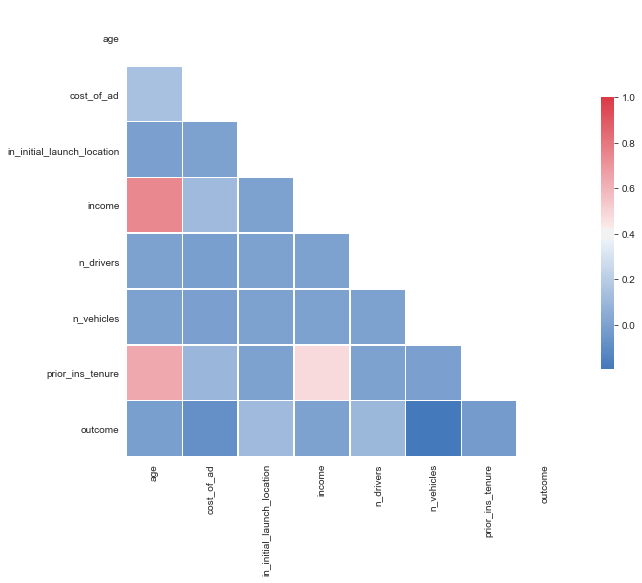

In [46]:
CorrMtx(df= dat, size = [10,10])

In [48]:
formula = 'outcome ~ age+cost_of_ad+device_type+gender+in_initial_launch_location+income+n_drivers+n_vehicles+prior_ins_tenure'

In [50]:
logit_model = smf.glm(formula=formula, data=dat, family = sm.families.Binomial())
result = logit_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                 9731
Model:                            GLM   Df Residuals:                     9718
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.8
Date:                Tue, 25 Feb 2020   Deviance:                       5013.7
Time:                        12:47:16   Pearson chi2:                 1.15e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [51]:
exp = np.exp(result.params)
ci = np.exp(result.conf_int())
ci.columns = ["2.5%", "97.5%"]
ci['exp'] = exp
ci['odds %'] = round((exp - 1), 2)*100
ci

,2.5%,97.5%,exp,odds %
Intercept,4.919748e-04,0.005761,0.001684,-100.0
device_type[T.desktop],1.004223e+00,1.454089,1.208400,21.0
device_type[T.iPhone],8.886275e-02,0.212703,0.137482,-86.0
device_type[T.laptop],1.705416e-01,0.286892,0.221194,-78.0
device_type[T.other],1.392493e-01,0.241329,0.183316,-82.0
gender[T.M],5.412486e+00,9.849895,7.301535,630.0
age,9.805089e-01,0.999918,0.990166,-1.0
cost_of_ad,3.153523e+246,inf,inf,inf
in_initial_launch_location,2.294958e+00,3.115584,2.673974,167.0
income,1.000001e+00,1.000014,1.000007,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [44]:
X = dat.drop("outcome",1)   #Feature Matrix
y = dat["outcome"]          #Target Variable

In [46]:
X_1 = sm.add_constant(X)#Fitting sm.OLS model
model = sm.Logit(y.astype('int'), X_1.astype('int')).fit()
model.summary() # still need to convert it into odd ratio since its logit!

ValueError: invalid literal for int() with base 10: 'iPhone'

In [43]:
cor = dat.corr()
cor_target = abs(cor["outcome"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

cost_of_ad                    0.080626
in_initial_launch_location    0.116644
n_drivers                     0.101983
n_vehicles                    0.195405
outcome                       1.000000
Name: outcome, dtype: float64